# Hipothesis 3

We want to understand if there is a connection between the condition and the grade of the house.


In [1]:
import pandas as pd
import sys
import missingno as msno
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from haversine import haversine, Unit

from optional.data_processing import *


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


df_all_housing_info = pd.read_csv('data/eda.csv')
#df_all_housing_info.isna().sum()
#type(df_all_housing_info['date'][2])

#df_all_housing_info = df_all_housing_info.query('grade >3')
#df_all_housing_info.info()
print(f"Grade values:{df_all_housing_info.grade.value_counts()}\n"
      f"Condition values:{df_all_housing_info.condition.value_counts()}")

Grade values:grade
7     8974
8     6065
9     2615
6     2038
10    1134
      ... 
5      242
12      89
4       27
13      13
3        1
Name: count, Length: 11, dtype: int64
Condition values:condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64


There is only 1 vote for Grade 3. A single Datapoint can be considered as an outlier, so we should eliminate it

In [2]:
df_all_housing_info=df_all_housing_info.drop(columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','date'])
df_all_housing_info = df_all_housing_info.query('grade>3')

In [3]:
#makes a count Column
count_grade = df_all_housing_info.groupby('grade').agg(
    count=('grade', 'count')
).reset_index()

# Rescale the grade so it matches the condition values
count_grade['rescaled_grade'] = 1 + ((count_grade['grade'] - 4) * (4 / 9)).round(1)


#makes a count Column
#count_cond=df_all_housing_info.condition.value_counts().sort_index()
count_cond=df_all_housing_info.groupby('condition').agg(count =('condition','count'))
count_grade


,grade,count,rescaled_grade
0,4,27,1.0
1,5,242,1.4
2,6,2038,1.9
3,7,8974,2.3
4,8,6065,2.8
5,9,2615,3.2
6,10,1134,3.7
7,11,399,4.1
8,12,89,4.6
9,13,13,5.0


In [32]:
count_cond

,count
condition,
1,29
2,170
3,14020
4,5677
5,1700


In [37]:
spearman_corr = df_all_housing_info[['condition', 'grade']].corr(method='spearman')
print(spearman_corr)


           condition     grade
condition   1.000000 -0.182143
grade      -0.182143  1.000000


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.v

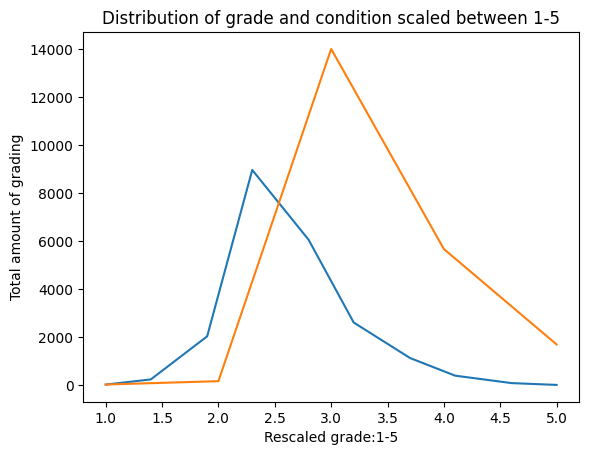

In [4]:
sns.lineplot(data=count_grade,x='rescaled_grade', y='count')
sns.lineplot(data=count_cond, x='condition', y='count')

plt.xlabel('Rescaled grade:1-5')
plt.ylabel('Total amount of grading')
plt.title('Distribution of grade and condition scaled between 1-5')

plt.savefig('data/grade_con_count_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
df_all_housing_info

,id,condition,grade,zipcode,price
0,7129300520,3,7,98178,221900.0
1,6414100192,3,7,98125,538000.0
2,5631500400,3,6,98028,180000.0
3,2487200875,5,7,98136,604000.0
4,1954400510,3,8,98074,510000.0
...,...,...,...,...,...
21592,263000018,3,8,98103,360000.0
21593,6600060120,3,8,98146,400000.0
21594,1523300141,3,7,98144,402101.0
21595,291310100,3,8,98027,400000.0


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.v

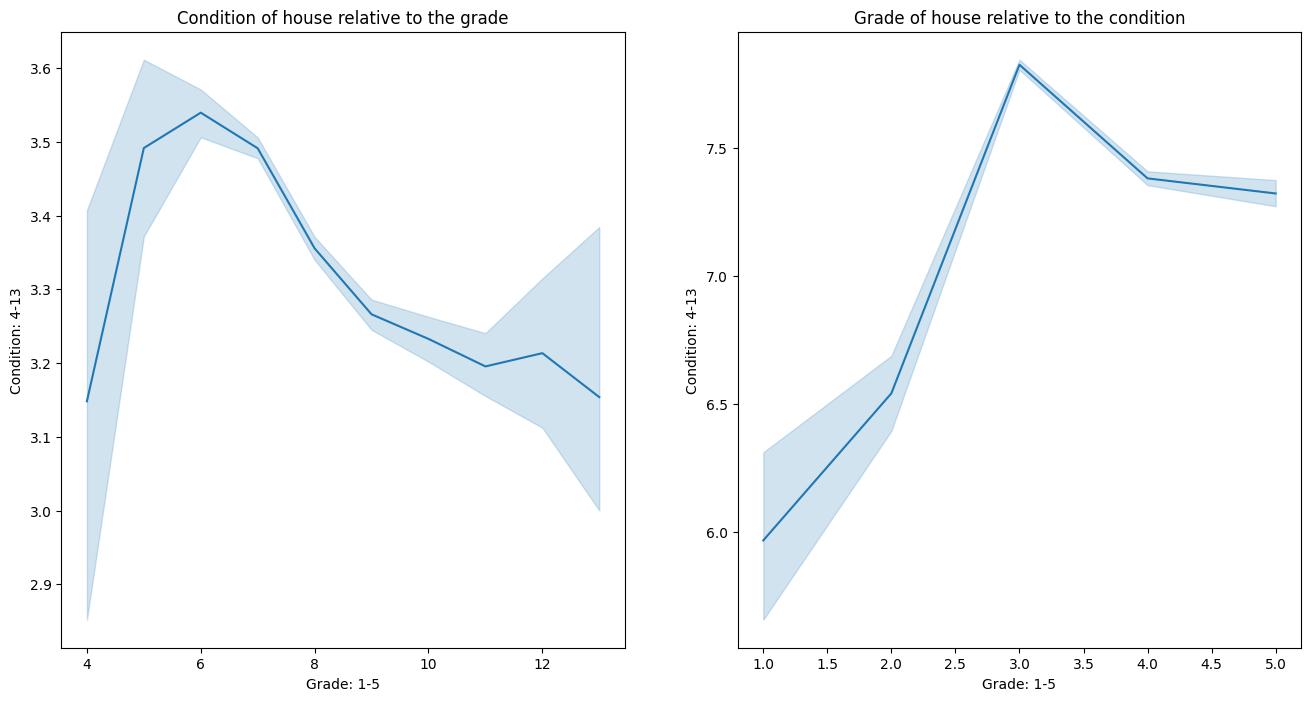

In [6]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

sns.lineplot(data=df_all_housing_info,x= 'grade', y='condition', ax=axes[0])
axes[0].set_xlabel('Grade: 1-5')
axes[0].set_ylabel('Condition: 4-13')
axes[0].set_title('Condition of house relative to the grade')


sns.lineplot(data=df_all_housing_info,x= 'condition', y='grade', ax=axes[1])
axes[1].set_ylabel('Condition: 4-13')
axes[1].set_xlabel('Grade: 1-5')
axes[1].set_title('Grade of house relative to the condition')

plt.savefig('data/grade_con_in_relation.png', dpi=300, bbox_inches='tight')

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.v

<Axes: xlabel='condition', ylabel='grade'>

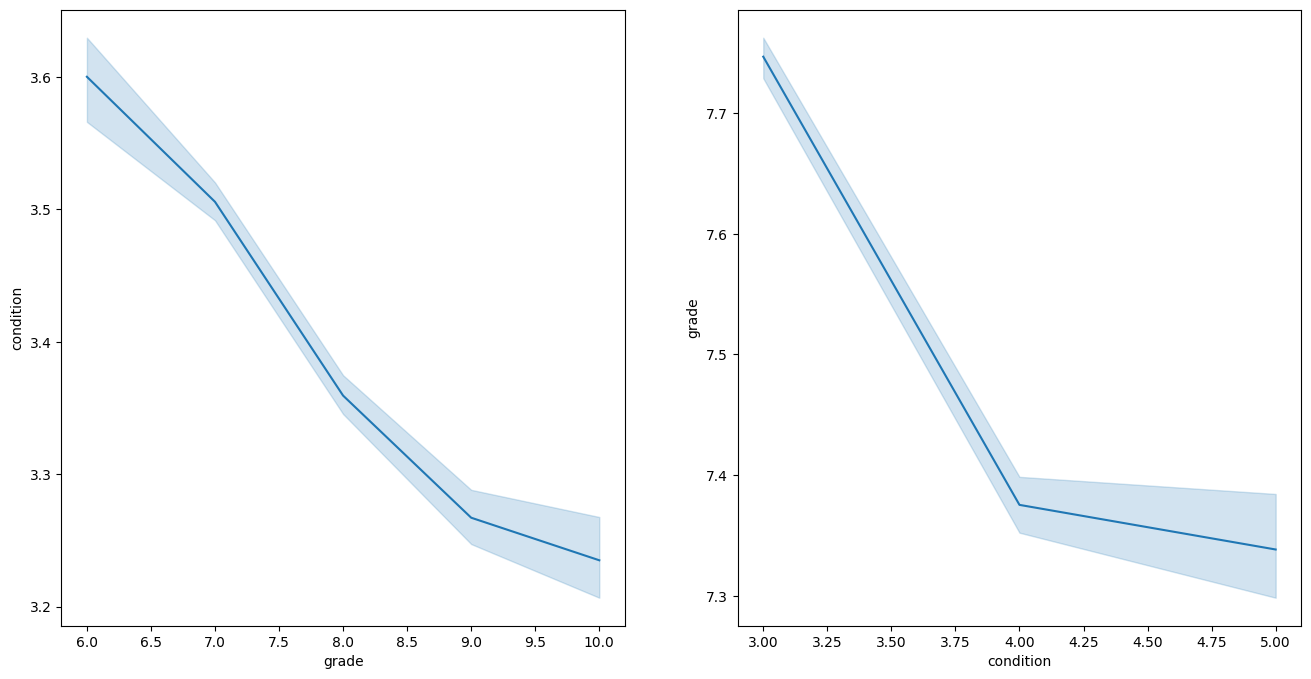

In [35]:
#Graph to see how condition,grade are dependent on each other 
fig, axes = plt.subplots(1,2, figsize=(16,8))
df_all_housing_info=df_all_housing_info.query('condition>=3 and 6<=grade<=10')
sns.lineplot(data=df_all_housing_info,x= 'grade', y='condition', ax=axes[0])
sns.lineplot(data=df_all_housing_info,x= 'condition', y='grade', ax=axes[1])

In [36]:
correlation_tot = df_all_housing_info[['condition','grade']].corr()
correlation_tot

,condition,grade
condition,1.000000,-0.169341
grade,-0.169341,1.000000


In [9]:
df_all_housing_info_middle = df_all_housing_info.copy()
df_all_housing_info_middle= df_all_housing_info_middle.query('2<grade<6 and 0<condition<3')
correlation_middle = df_all_housing_info_middle[['grade','condition']].corr()
correlation_middle 

,grade,condition
grade,1.000000,-0.139076
condition,-0.139076,1.000000


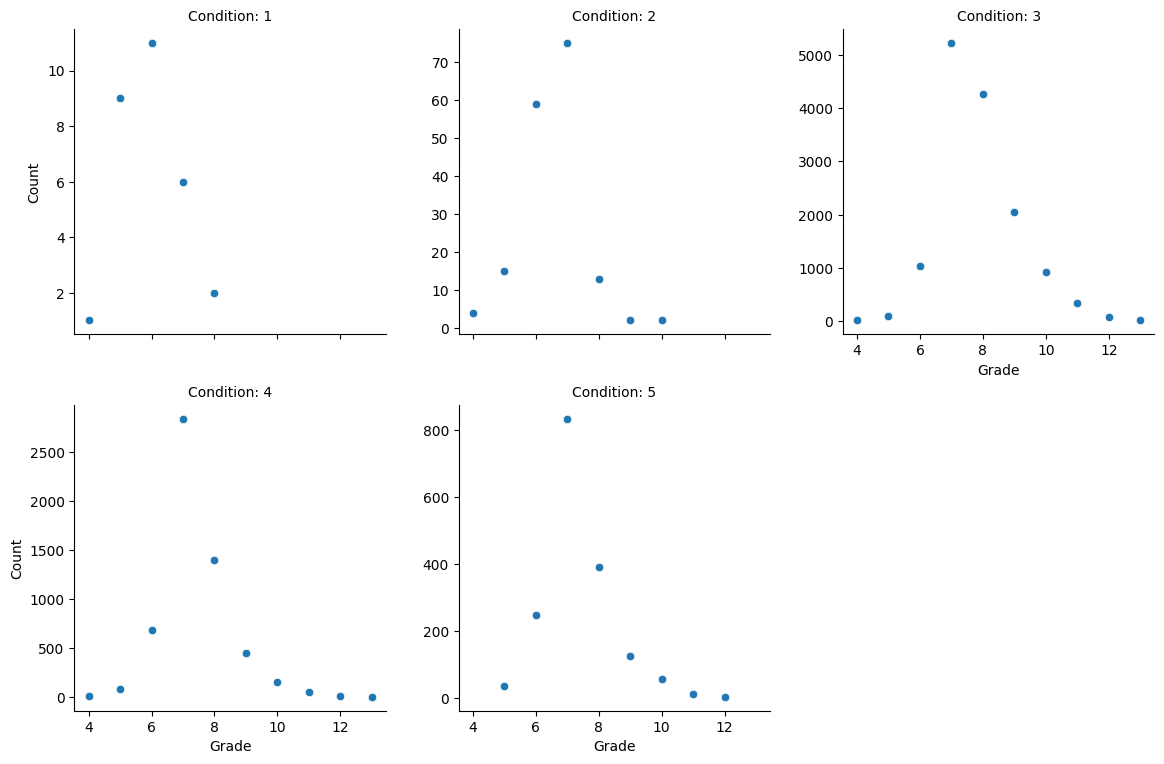

In [10]:
# Berechnung der Count-Spalte
df_all_housing_info['count'] = df_all_housing_info.groupby(['grade', 'condition'])['grade'].transform('count')

# FacetGrid erstellen
g = sns.FacetGrid(df_all_housing_info, col="condition", col_wrap=3, height=4, sharey=False)

# Scatterplot zu jedem Facet hinzufügen
g.map(sns.scatterplot, "grade", "count")

# Globale Titel und Labels
g.set_axis_labels("Grade", "Count")
g.set_titles("Condition: {col_name}")
g.tight_layout(pad=2)

# Plot anzeigen
plt.savefig('data/grade_con_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

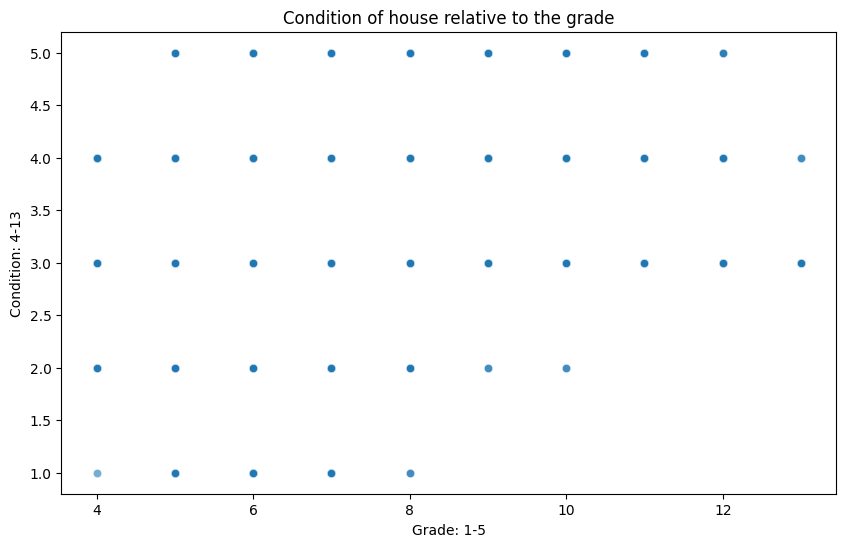

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df_all_housing_info, x='grade', y='condition', alpha=0.6, ax=ax)
ax.set_xlabel('Grade: 1-5')
ax.set_ylabel('Condition: 4-13')
ax.set_title('Condition of house relative to the grade')

#plt.savefig('data/grade_condition_scatter.png', dpi=300, bbox_inches='tight')
plt.show()


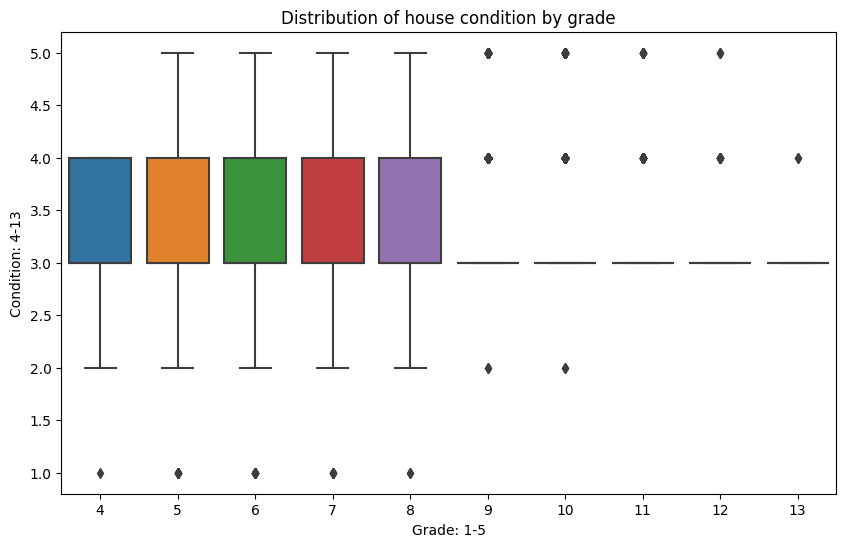

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df_all_housing_info, x='grade', y='condition', ax=ax)
ax.set_xlabel('Grade: 1-5')
ax.set_ylabel('Condition: 4-13')
ax.set_title('Distribution of house condition by grade')

#plt.savefig('data/grade_condition_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


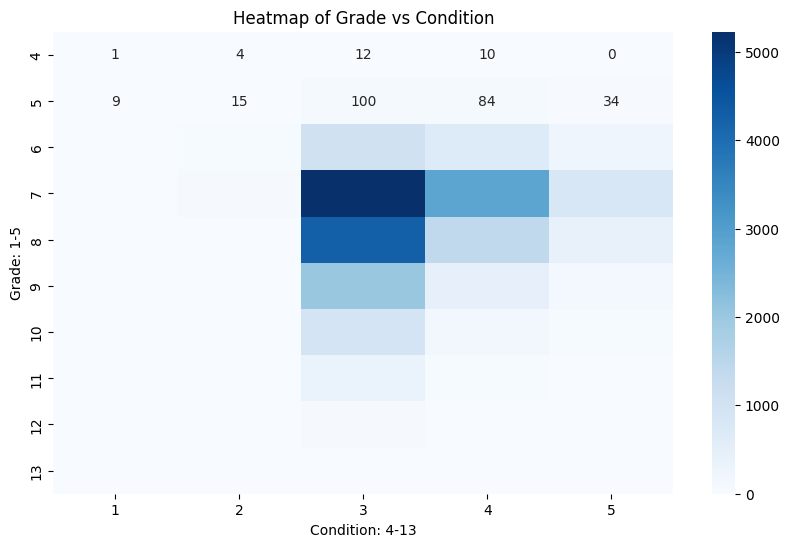

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

heatmap_data = df_all_housing_info.groupby(['grade', 'condition']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt="d", ax=ax)
ax.set_xlabel('Condition: 4-13')
ax.set_ylabel('Grade: 1-5')
ax.set_title('Heatmap of Grade vs Condition')

#plt.savefig('data/grade_condition_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


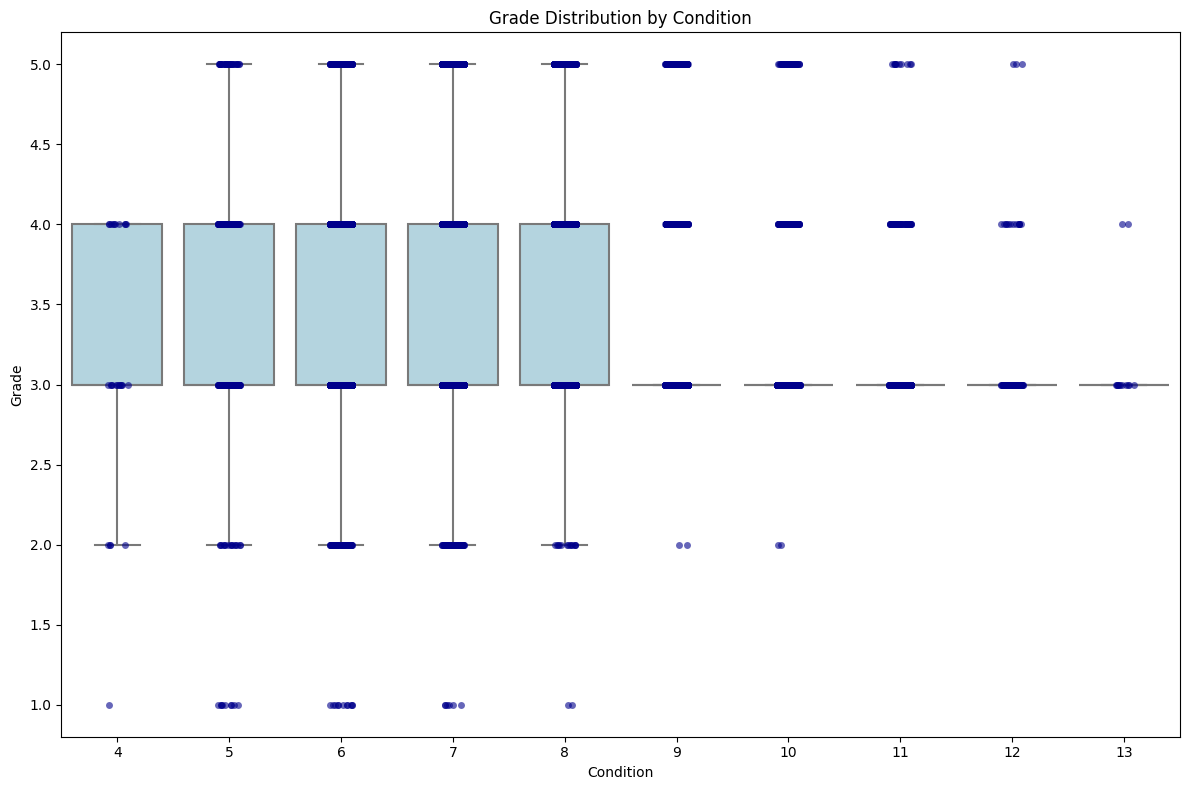

In [15]:
plt.figure(figsize=(12, 8))

# Boxplot
sns.boxplot(data=df_all_housing_info, y='condition', x='grade', color='lightblue', showfliers=False)

# Scatterplot
sns.stripplot(data=df_all_housing_info, y='condition', x='grade', jitter=True, alpha=0.6, color='darkblue')

plt.title('Grade Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.tight_layout()
#plt.savefig('data/grade_condition_box_scatter.png', dpi=300)
plt.show()


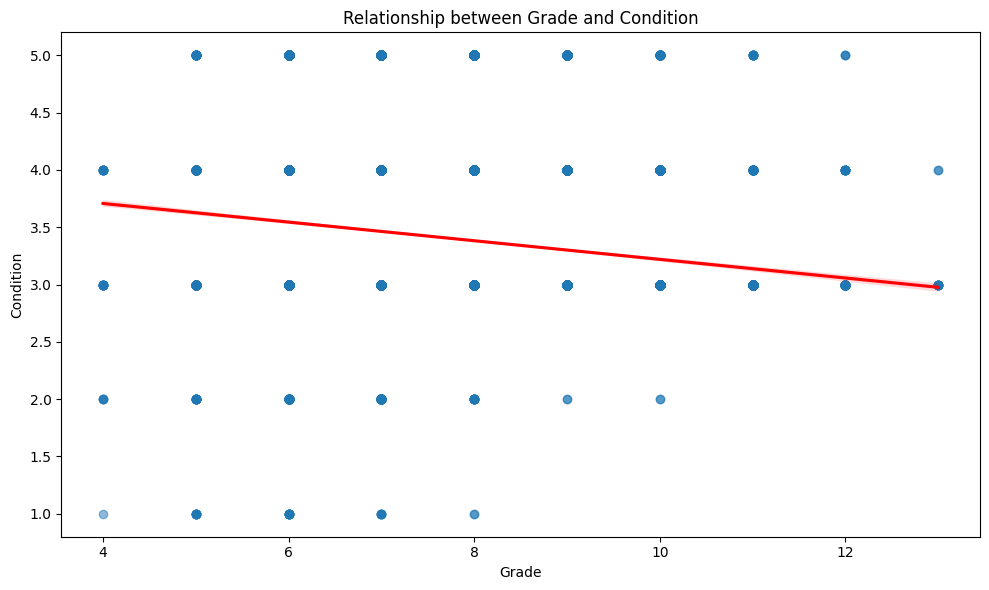

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=df_all_housing_info, x='grade', y='condition', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relationship between Grade and Condition')
plt.xlabel('Grade')
plt.ylabel('Condition')
plt.tight_layout()
#plt.savefig('data/grade_condition_regression.png', dpi=300)
plt.show()


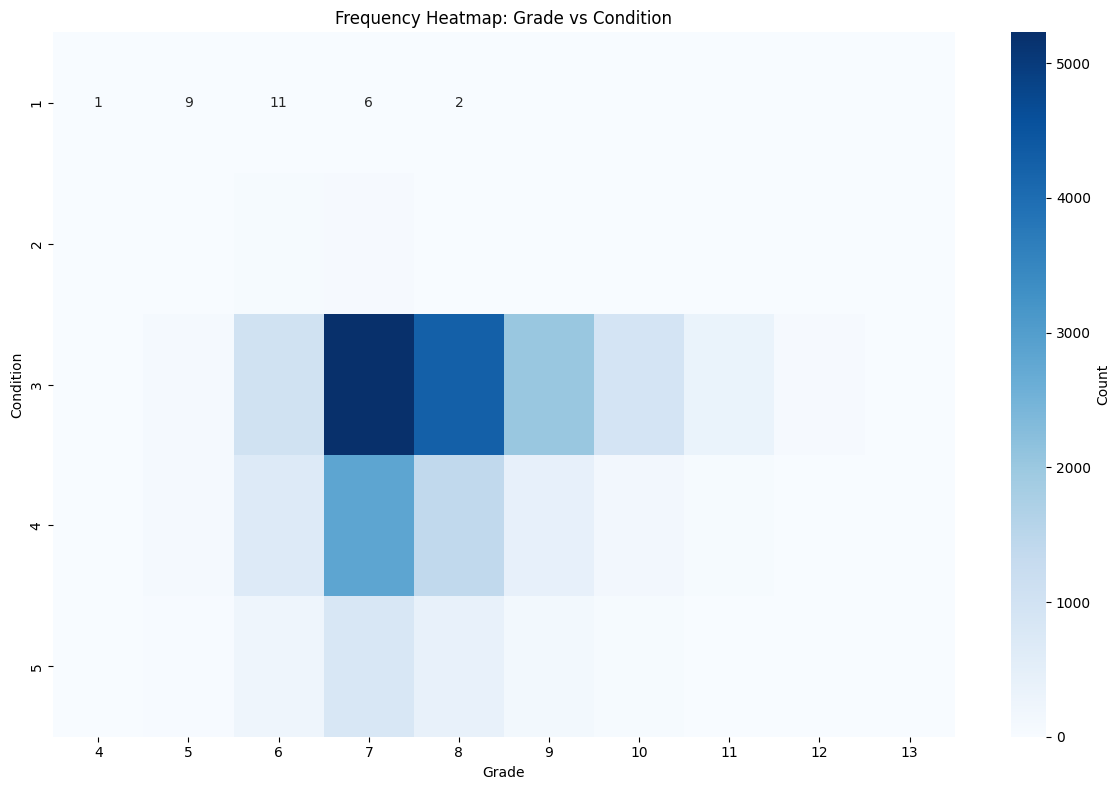

In [17]:
# Kreuztabellierung erstellen
heatmap_data = df_all_housing_info.pivot_table(
    index='condition',
    columns='grade',
    aggfunc='size',
    fill_value=0
)

# Heatmap erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Frequency Heatmap: Grade vs Condition')
plt.xlabel('Grade')
plt.ylabel('Condition')
plt.tight_layout()
plt.savefig('data/grade_condition_frequency_heatmap.png', dpi=300)
plt.show()


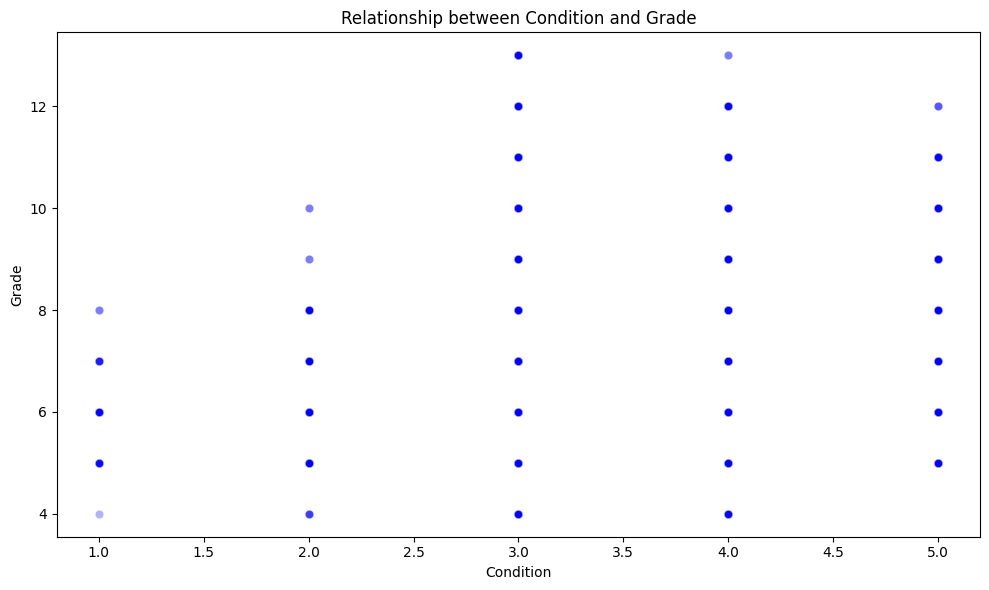

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all_housing_info, x='condition', y='grade', alpha=0.3, color='blue')
plt.title('Relationship between Condition and Grade')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.tight_layout()
plt.savefig('data/grade_condition_scatter_transparency.png', dpi=300)
plt.show()


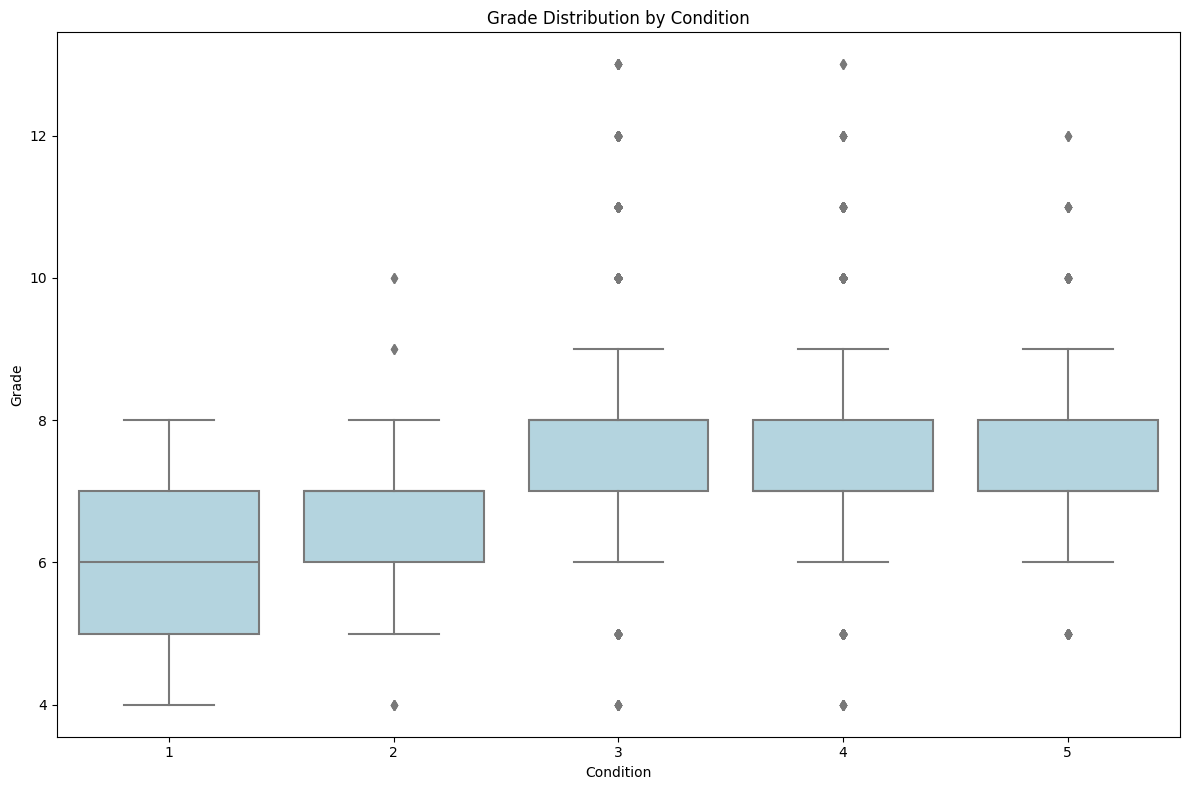

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_all_housing_info, x='condition', y='grade', showfliers=True, color='lightblue')
plt.title('Grade Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.tight_layout()
#plt.savefig('data/grade_condition_boxplot.png', dpi=300)
plt.show()


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


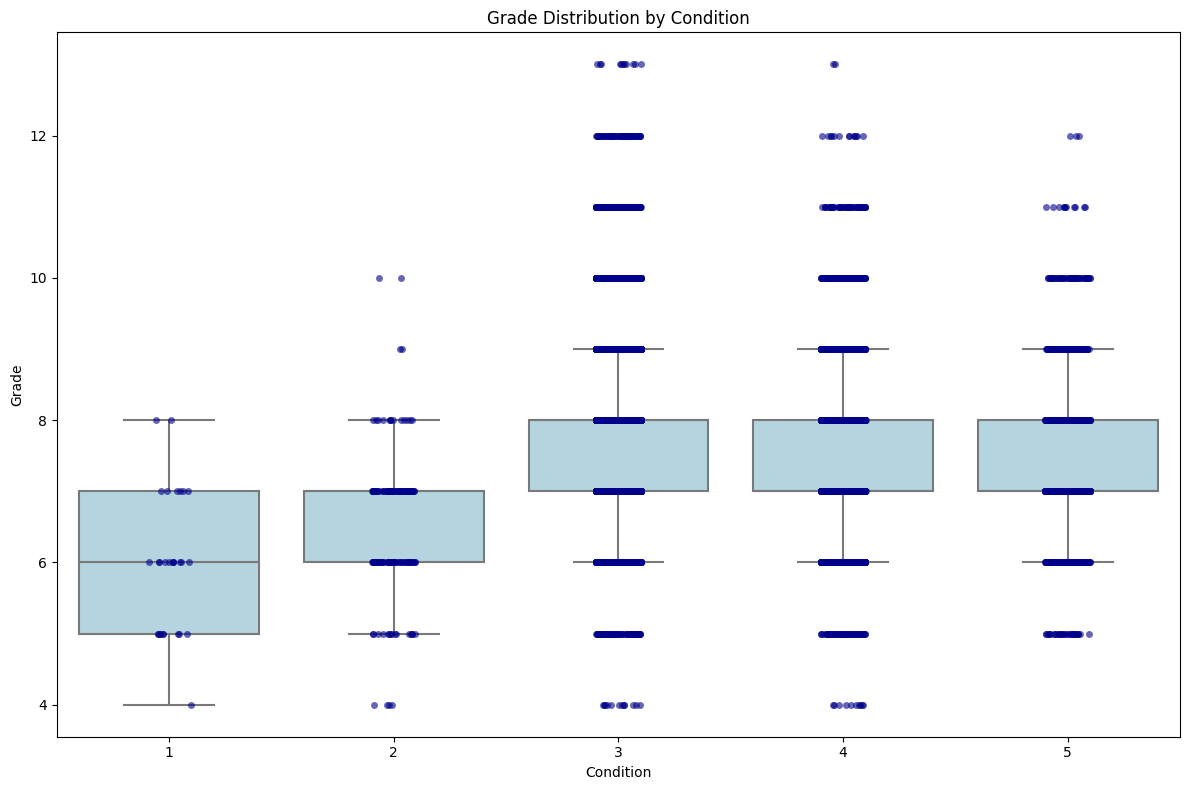

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_all_housing_info, x='condition', y='grade', showfliers=False, color='lightblue')
sns.stripplot(data=df_all_housing_info, x='condition', y='grade', jitter=True, alpha=0.6, color='darkblue')
plt.title('Grade Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.tight_layout()
#plt.savefig('data/grade_condition_box_stripplot.png', dpi=300)
plt.show()


/tmp/ipykernel_93823/3125917887.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'QuadContourSet' object has no attribute 'collections'

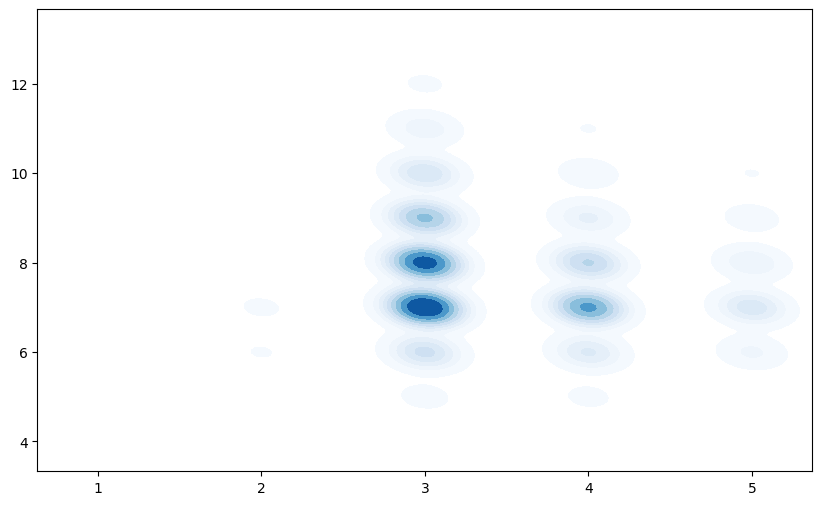

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_all_housing_info,
    x='condition',
    y='grade',
    cmap='Blues',
    shade=True,  # Ältere Alternative zu `fill`
    thresh=0.05
)
plt.title('Density Plot: Grade vs Condition')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.tight_layout()
plt.savefig('data/grade_condition_kdeplot.png', dpi=300)
plt.show()


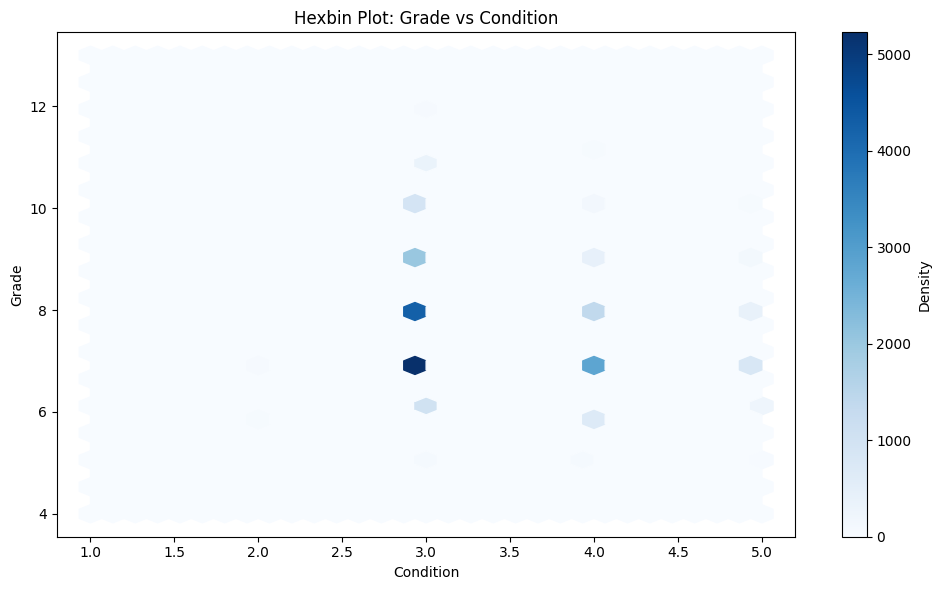

In [25]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    df_all_housing_info['condition'],
    df_all_housing_info['grade'],
    gridsize=30,
    cmap='Blues'
)
plt.colorbar(label='Density')
plt.title('Hexbin Plot: Grade vs Condition')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.tight_layout()
#plt.savefig('data/grade_condition_hexbinplot.png', dpi=300)
plt.show()



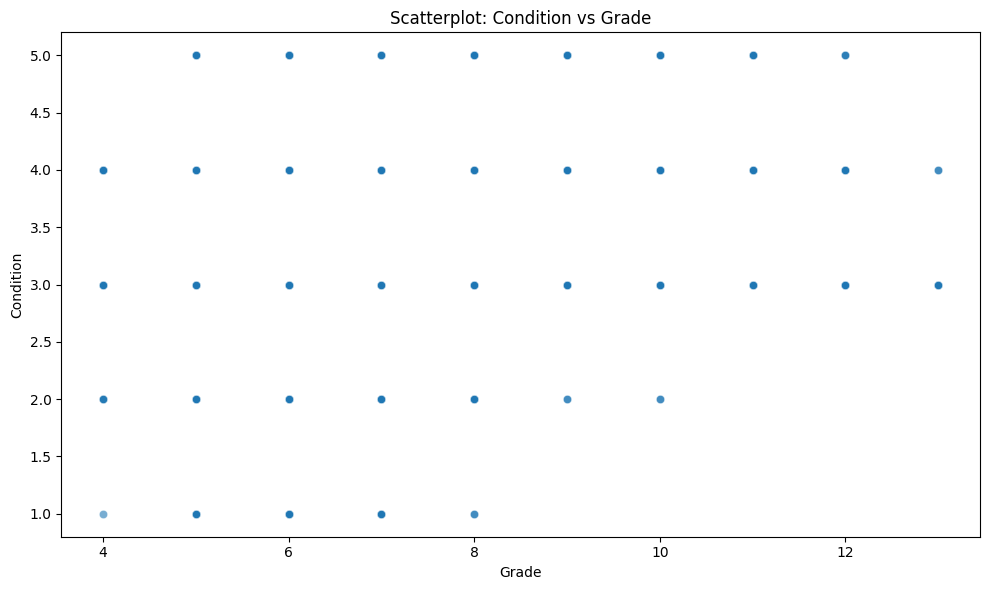

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all_housing_info, x='grade', y='condition', alpha=0.6)
plt.title('Scatterplot: Condition vs Grade')
plt.xlabel('Grade')
plt.ylabel('Condition')
plt.tight_layout()
plt.savefig('data/scatter_condition_vs_grade.png', dpi=300)
plt.show()


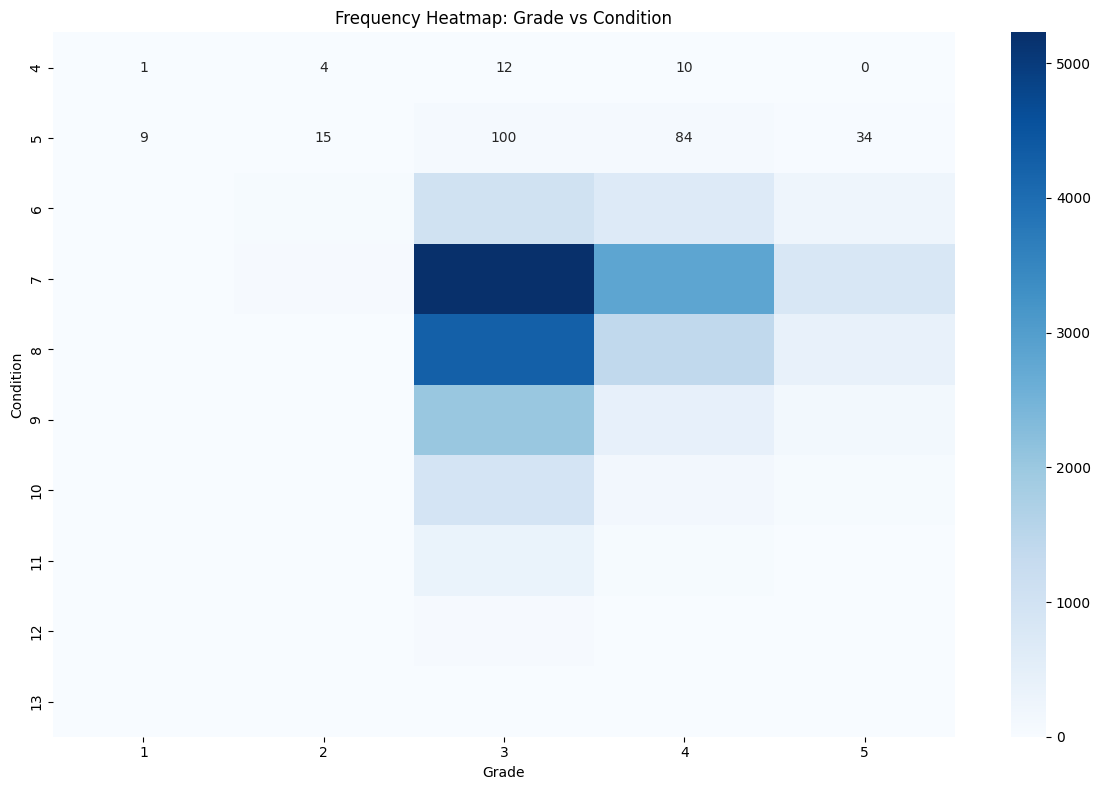

In [ ]:
heatmap_data = df_all_housing_info.groupby(['grade', 'condition']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Frequency Heatmap: Grade vs Condition')
plt.xlabel('Grade')
plt.ylabel('Condition')
plt.tight_layout()
#plt.savefig('data/heatmap_condition_vs_grade.png', dpi=300)
plt.show()


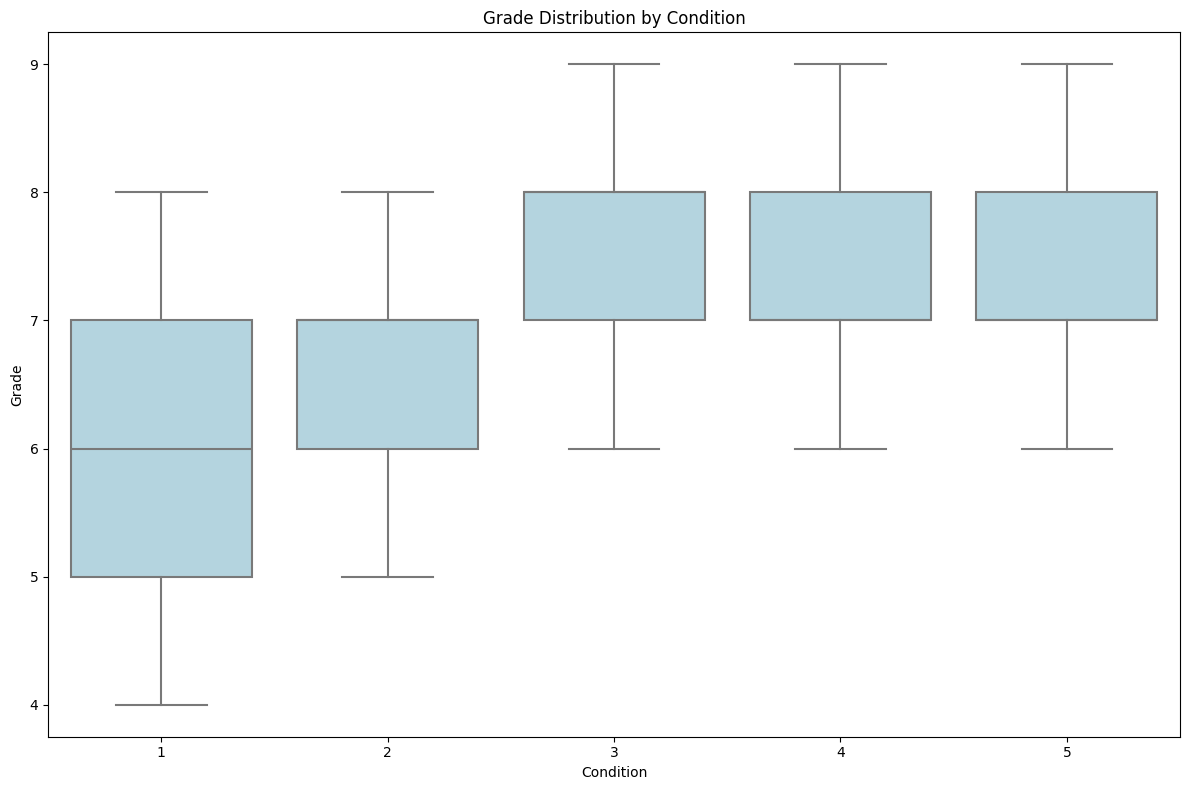

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_all_housing_info, x='condition', y='grade', showfliers=False, color='lightblue')
plt.title('Grade Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.tight_layout()
#plt.savefig('data/boxplot_condition_vs_grade.png', dpi=300)
plt.show()


/tmp/ipykernel_93823/4288895685.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all_housing_info, x='grade', y='condition', ci=None, ax=axes[0])
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_93823/4288895685.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df

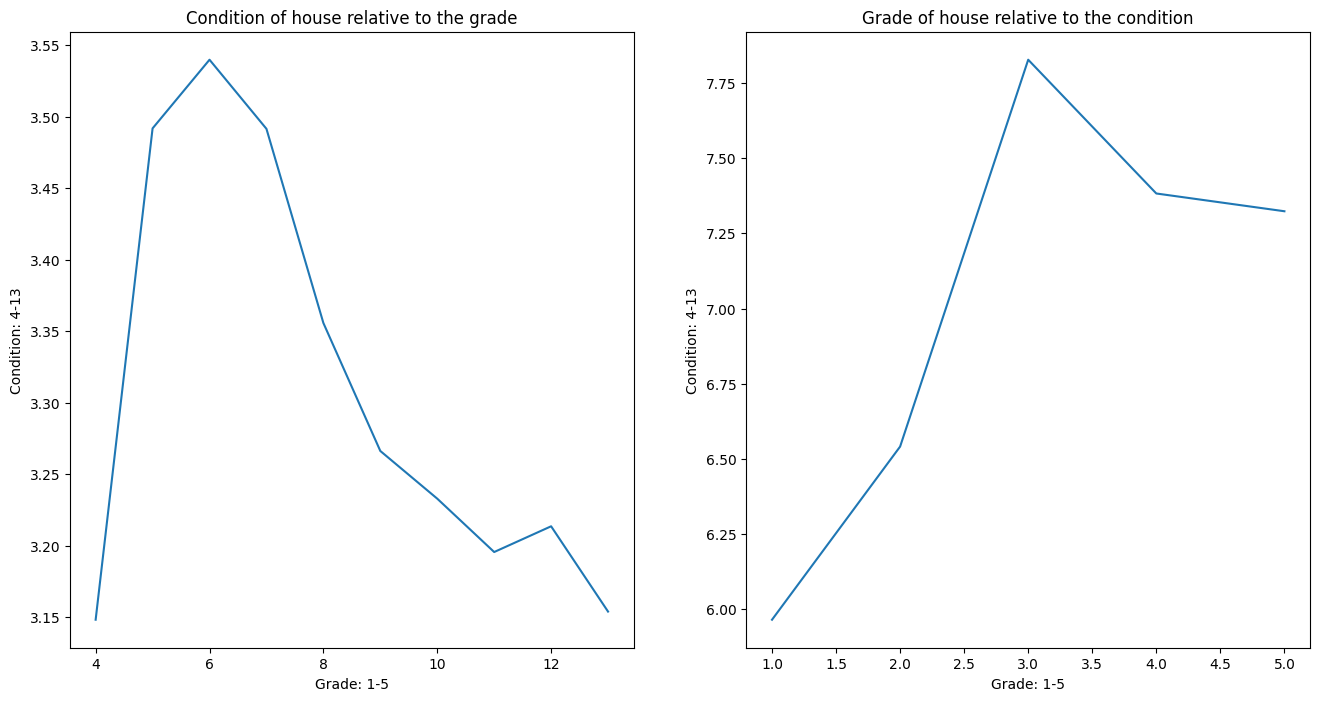

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.lineplot(data=df_all_housing_info, x='grade', y='condition', ci=None, ax=axes[0])
axes[0].set_xlabel('Grade: 1-5')
axes[0].set_ylabel('Condition: 4-13')
axes[0].set_title('Condition of house relative to the grade')

sns.lineplot(data=df_all_housing_info, x='condition', y='grade', ci=None, ax=axes[1])
axes[1].set_ylabel('Condition: 4-13')
axes[1].set_xlabel('Grade: 1-5')
axes[1].set_title('Grade of house relative to the condition')

#plt.savefig('data/grade_condition_no_ci.png', dpi=300, bbox_inches='tight')
plt.show()


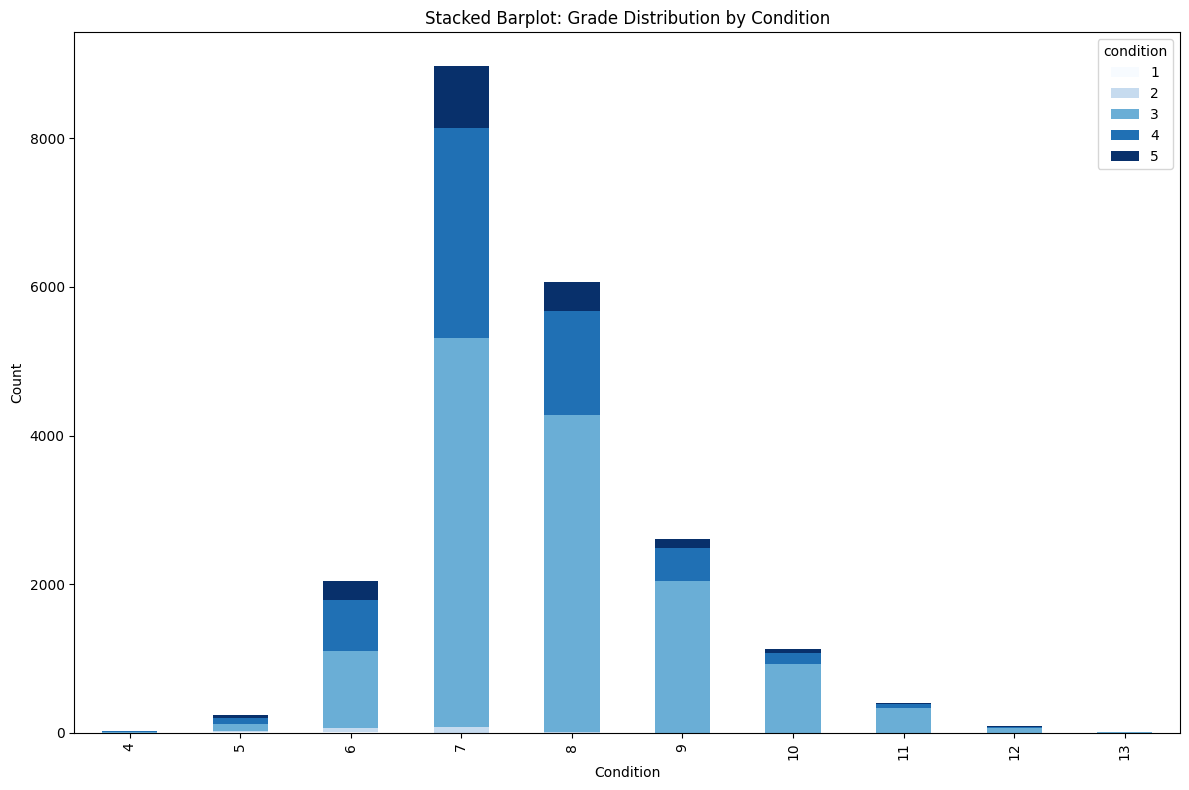

In [31]:
# Daten für Stacked Barplot vorbereiten
stacked_data = df_all_housing_info.groupby(['grade','condition']).size().unstack(fill_value=0)

# Stacked Barplot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Blues')
plt.title('Stacked Barplot: Grade Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('data/stacked_barplot_condition_grade.png', dpi=300)
plt.show()
